In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/Users/nikhil/Downloads/haberman.csv')

In [3]:
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


Dataset has no column names. Sol first let's give correct column names.

In [4]:
data.columns = ['age', 'operation_year', 'axil_nodes', 'survival_status']
data.head()

,age,operation_year,axil_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              305 non-null    int64
 1   operation_year   305 non-null    int64
 2   axil_nodes       305 non-null    int64
 3   survival_status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
data.describe()

,age,operation_year,axil_nodes,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
data['survival_status'].value_counts()

1    224
2     81
Name: survival_status, dtype: int64

In [8]:
data['age'].value_counts().sort_index()

30     2
31     2
33     2
34     7
35     2
36     2
37     6
38    10
39     6
40     3
41    10
42     9
43    11
44     7
45     9
46     7
47    11
48     7
49    10
50    12
51     6
52    14
53    11
54    13
55    10
56     7
57    11
58     7
59     8
60     6
61     9
62     7
63     8
64     5
65    10
66     5
67     6
68     2
69     4
70     7
71     1
72     4
73     2
74     2
75     1
76     1
77     1
78     1
83     1
Name: age, dtype: int64

In [9]:
data['operation_year'].value_counts().sort_index()

58    36
59    27
60    28
61    26
62    23
63    30
64    30
65    28
66    28
67    25
68    13
69    11
Name: operation_year, dtype: int64

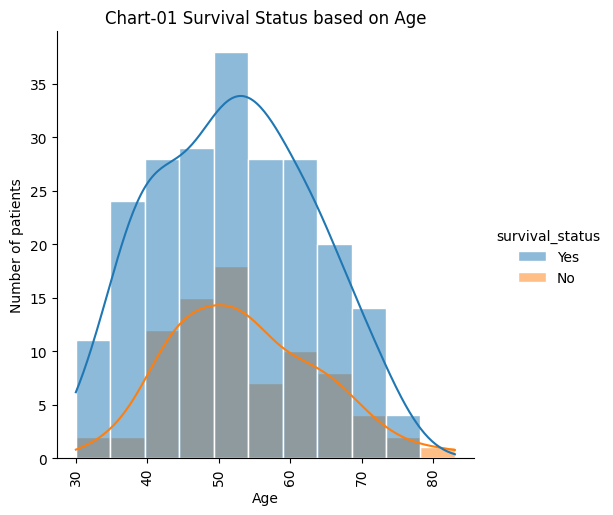

In [27]:
sns.displot(data=data, 
            x ='age',
            hue='survival_status',
            color='darkblue',
            kind='hist', 
            kde=True, 
            edgecolor='white', 
            palette=["C0", "C1"],
#             bins=50
           )
plt.title('Chart-01 Survival Status based on Age')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.xticks(rotation=90)
plt.show()

1. Patients between age 30-40 have survived 5 years and longer.
2. Patients whose age is more than 75 died within 5 years of the operation.
3. More number of patients between age 40-55 died within 5 years of operation.

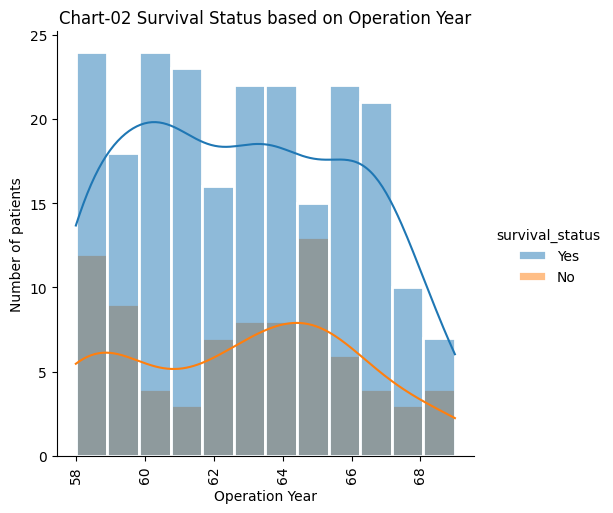

In [30]:
sns.displot(data=data, 
            x = 'operation_year',
            hue='survival_status',
            color='darkblue',
            kind='hist', 
            kde=True, 
            edgecolor='white', 
            linewidth=2, 
            palette=["C0", "C1"],
            bins=12
           )
plt.title('Chart-02 Survival Status based on Operation Year')
plt.xlabel('Operation Year')
plt.ylabel('Number of patients')
plt.xticks(rotation=90)
plt.show()

1. Patients operated between year 1960-67 falls under status 1, whereas year 1965 has a large number of status 2 patients.
2. 1958-60, 1968, 1969 have patients falling under status 2.

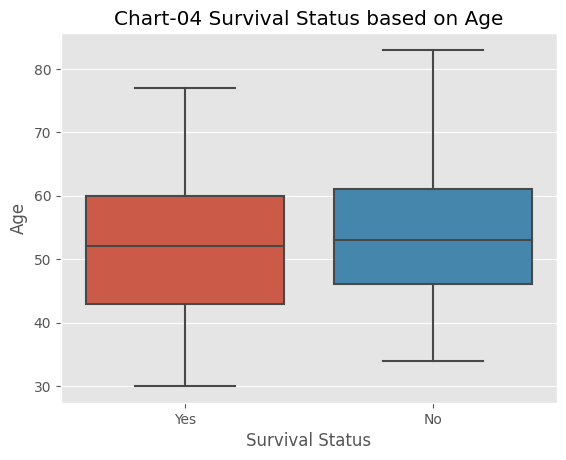

In [40]:
plt.style.use('ggplot')
sns.boxplot(data=data, x=data['survival_status'], y= data['age'],  palette=["C0", "C1"])
plt.title('Chart-04 Survival Status based on Age')
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.show()

1. The 25th percentile of patients who have survived are of approx age of 42 years while who have not survived are of approx 46 years.
2. The 50th percentile of patients who have survived are of approx age of 52 years while who have not survived are of approx 54 years.
3. The 75th percentile of patients who have survived are of approx age of 60 years while who have not survived are of approx 61 years.

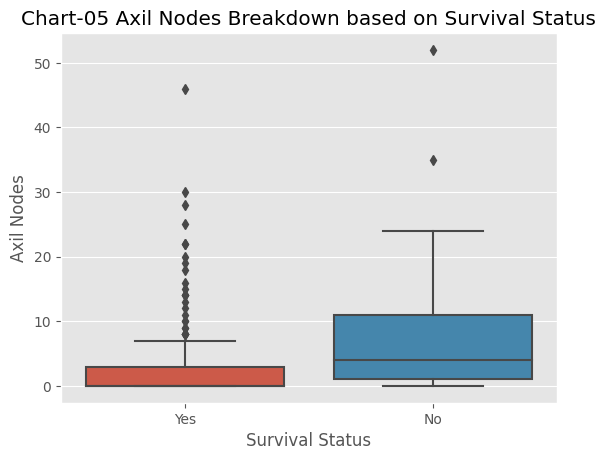

In [41]:
sns.boxplot(data=data, y= data['axil_nodes'], x=data['survival_status'], palette=["C0", "C1"])
plt.title('Chart-05 Axil Nodes Breakdown based on Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Axil Nodes')
plt.show()

1. The 75th percentile of surviving patients have 4 nodes.
2. Whereas 75 percentile of patients who have not survived have 5 nodes. 
This shows having low count of nodes is a factor in the survival of patients.

<Figure size 1000x800 with 0 Axes>

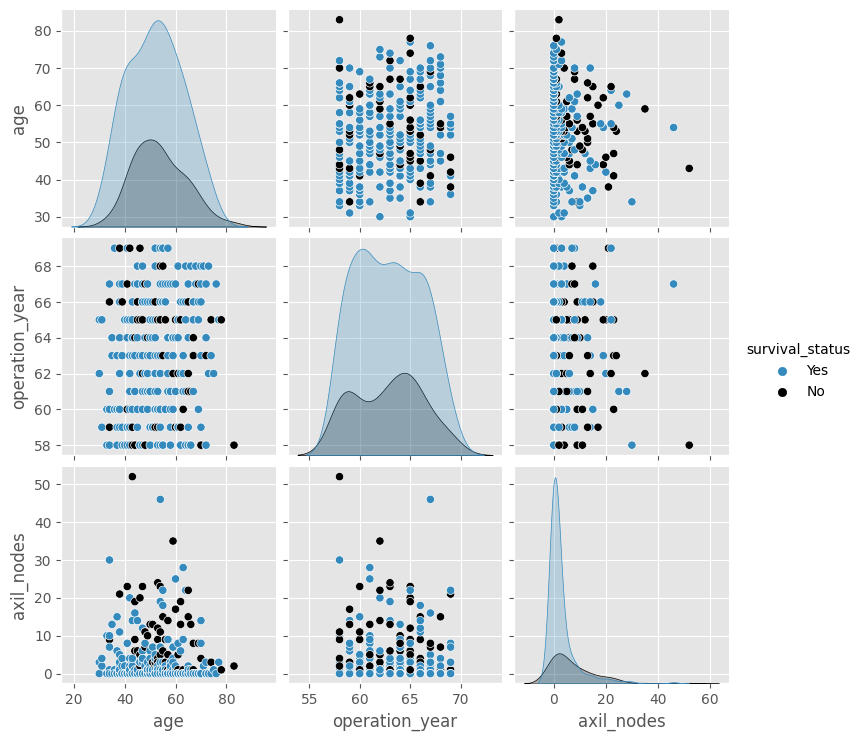

In [42]:
plt.figure(figsize=(10,8))
sns.pairplot(data=data, hue='survival_status', palette=['C1', 'k'])
#plt.title('Chart-06 Axil Nodes Breakdown based on Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Axil Nodes')
plt.show()

#### Age vs Axil Nodes
The data point are very overlapping so its hard to conclude but we can say that patients age of 40 and above with having more number of nodes falling highly under status 2.

#### Operation Year vs Axil Nodes
Patients who has operated in late 60s with less number of nodes have great surviving rate.

In [5]:
data['survival_status'] = data['survival_status'].map({1: 'Yes', 2: 'No'})
data.head()

,age,operation_year,axil_nodes,survival_status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes


/Users/nikhil/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/nikhil/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args,

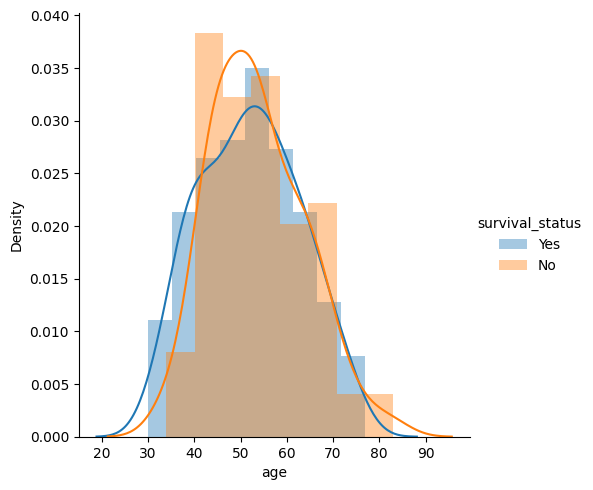

In [18]:
sns.FacetGrid(data=data, hue='survival_status',height = 5).map(sns.distplot,'age').add_legend()
plt.show()

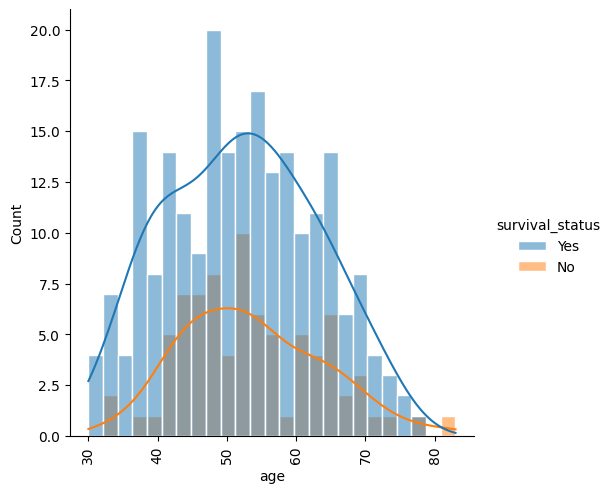

In [14]:
sns.displot(data=data, 
            x ='age',
            hue='survival_status',
            kind='hist', 
            kde=True, 
            edgecolor='white', 
            palette=["C0", "C1"],
            height=5,
            bins=25
           )
plt.title('')
plt.xticks(rotation=90)
plt.show()

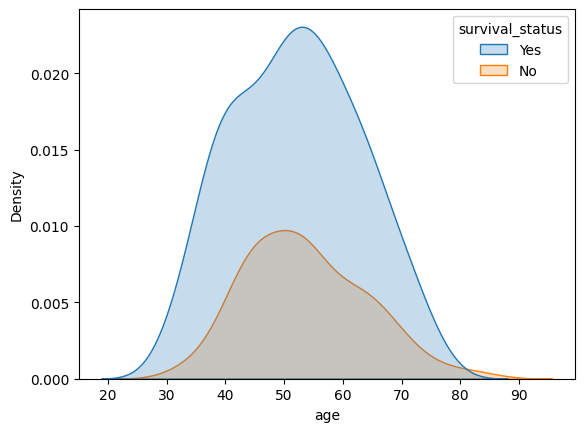

In [29]:
sns.kdeplot(data=data,x='age',hue='survival_status', fill=True)
plt.show()

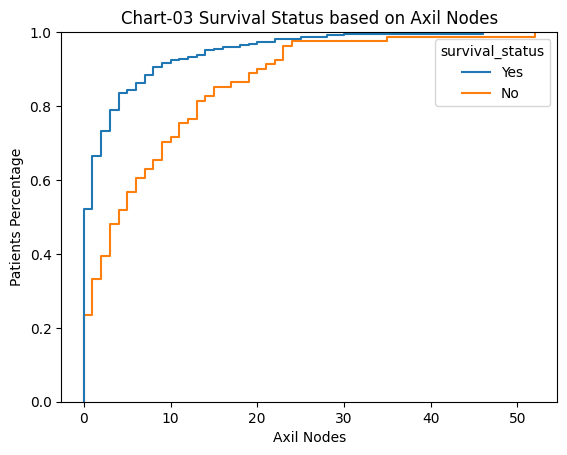

In [38]:
sns.ecdfplot(data, x='axil_nodes', hue='survival_status')
plt.title('Chart-03 Survival Status based on Axil Nodes')
plt.xlabel('Axil Nodes')
plt.ylabel('Patients Percentage')
plt.show()

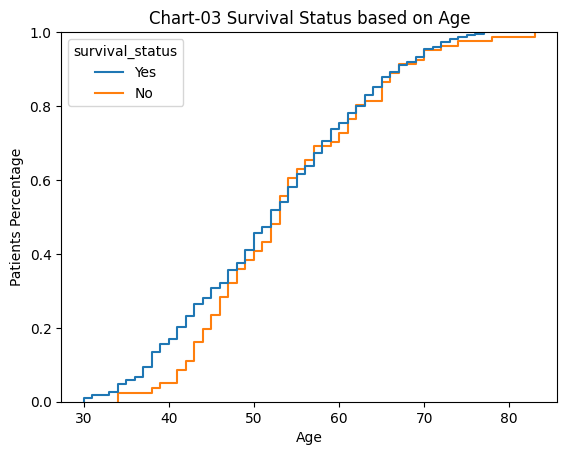

In [39]:
sns.ecdfplot(data, x='age', hue='survival_status')
plt.title('Chart-03 Survival Status based on Age')
plt.xlabel('Age')
plt.ylabel('Patients Percentage')
plt.show()

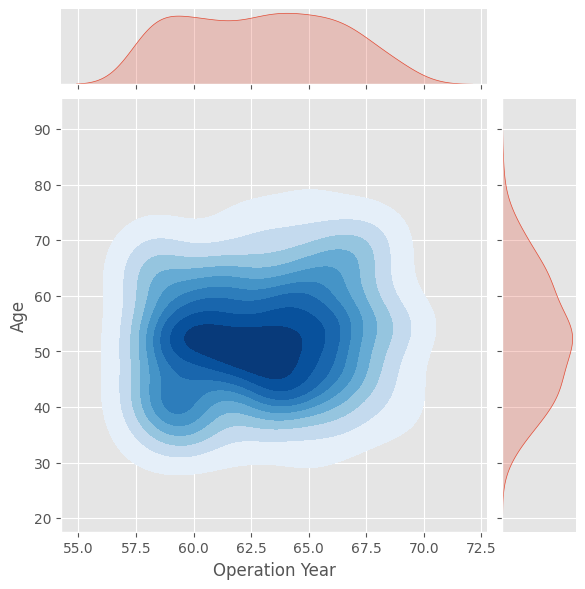

In [58]:
sns.jointplot(x = 'operation_year', y = 'age', data = data, kind = 'kde', fill=True, cmap='Blues')
# plt.title('Chart-07 Relation Between Operation Year and Age')
plt.xlabel('Operation Year')
plt.ylabel('Age')
plt.show()

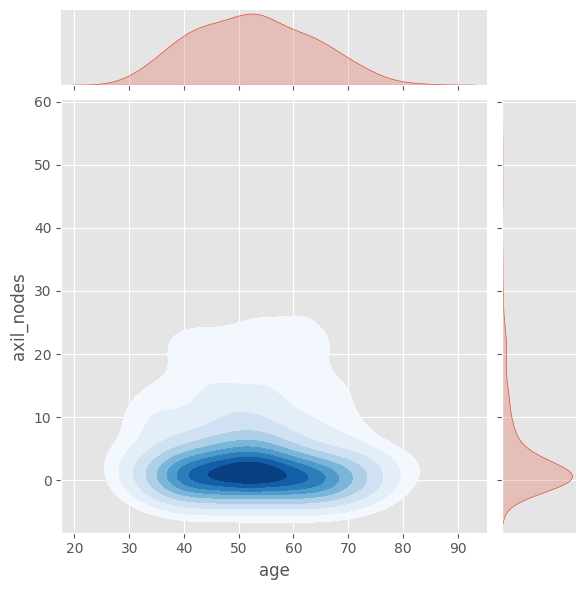

In [55]:
sns.jointplot(y = 'axil_nodes', x = 'age', data = data, fill=True, cmap='Blues', kind='kde')

plt.show()

In [100]:
data[data['axil_nodes'] >= 4].shape

(89, 4)

In [91]:
data[data['axil_nodes'] <= 4]['survival_status'].value_counts()

Yes    187
No      42
Name: survival_status, dtype: int64

In [81]:
import statsmodels.api as sm

In [122]:
n = 229
pnull = 0.6
phat = 0.8
sm.stats.proportions_ztest(phat*n, n, pnull)

(7.566372975210781, 3.837891064429892e-14)

In [121]:
from scipy.stats import binom
prob = 1-binom.cdf(187,229, 0.09)
# str(round(prob*100, 10))
prob

0.0

In [138]:
import statsmodels.api as sm
pValue = sm.stats.ztest(
            data['axil_nodes'], 
            value=4, 
            alternative='larger')[1]
pValue

0.46514183026723827